In [1]:
import csv
import re
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.plotly as py
import cufflinks as cf

In [2]:
def read_ld(filename):
    myfile = open(filename)
    chra = []
    bpa = []
    snpa = []
    chrb = []
    bpb = []
    snpb = []
    r2 = []
    distances = [] 

    for  row in myfile:
         if 'CHR_A' in row:
                continue
         line = row.split()
         chra.append(line[0])
         bpa.append(int(line[1]))
         snpa.append(line[2])
         chrb.append(line[3])
         bpb.append(int(line[4]))
         snpb.append(line[5])
         r2.append(float(line[6]))
    myfile.close()
 
    for i in range (0, len(bpa)):
        distances.append( (  int (bpb[i]) -  int(bpa[i])) )   
    return (r2, distances)
    

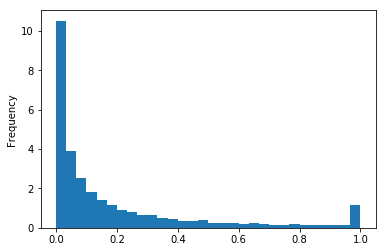

In [10]:
r2,_ = read_ld('plink.1000.txt')
%matplotlib inline
x = r2
plt.hist(x, normed=True, bins=30)
#plt.xticks(distances)
plt.ylabel('Frequency');

(0.19709205089307416, 0.18883664504200348, 0.1888532053446027, 0.18885133801492709)


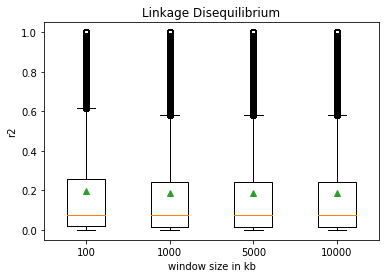

In [6]:
r2_100,_ = read_ld('plink.100.txt')
r2_1000,_ = read_ld('plink.1000.txt')
r2_5000,_ = read_ld('plink.5000.txt')
r2_10000,_ = read_ld('plink.10000.txt')
max1 = np.mean(r2_100)
max2 = np.mean(r2_1000)
max3 = np.mean(r2_5000)
max4 = np.mean(r2_10000)
print (max1, max2, max3, max4)

data = [r2_100, r2_1000, r2_5000, r2_10000]
# multiple box plots on one figure
plt.figure()
plt.boxplot(data, showmeans=True)
plt.xticks([1, 2,3, 4], ['100','1000', '5000', '10000'])
plt.xlabel('window size in kb')
plt.ylabel('r2')
plt.title('Linkage Disequilibrium')
plt.show() 
plt.savefig('ld.png')

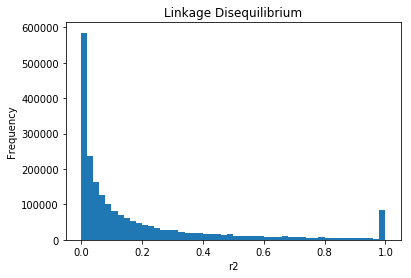

In [9]:
r2, distances = read_ld('plink.1000.txt')
%matplotlib inline
x = r2
plt.hist(x, normed=False, bins=50)
#plt.xticks(distances)
plt.ylabel('Frequency')
plt.title('Linkage Disequilibrium')
plt.xlabel('r2')
plt.figure(figsize=(4,4), dpi=100)
plt.savefig('ld-hist.png',dpi = 600)